#  <font color='red'> Game trends in NBA. 

### Analysis of NBA game data and player data with Python Pandas and Scikit-learn. We look at the connection of game trends with height weight data of players.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nba_models import *
from nba_hw_analysis import *
import seaborn as sns
%matplotlib notebook
from scipy.stats import pearsonr

In [2]:
from IPython.core.display import display, HTML
from IPython.core.magic import register_cell_magic, register_line_cell_magic, register_line_magic

In [3]:
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.titleweight'] = 'bold'

##  <font color='blue'> Evolution of 3-pointers, 2-pointers and free throws.

### Import Player Statistics data file 'Seasons_Stats.csv'

In [4]:
df = pd.read_csv('data/Seasons_stats.csv')
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


### Lets filter out relevant columns and aggregate over years.

In [5]:
df1 = df[['Year','Player','PTS','3PA','2PA','3P%','2P%','FTA','FT%','Pos']].dropna(axis=0)
df2 = df1.groupby('Year').aggregate('mean').reset_index()

In [6]:
print(df2.columns)

Index(['Year', 'PTS', '3PA', '2PA', '3P%', '2P%', 'FTA', 'FT%'], dtype='object')


### Please note that we have aggregated statistics on 3-pointer and 2-pointer shots, as well as free throws and the total number of field goals, attempted and made. Let us now plot these statistics over year and see the trends.

### The above shows that number of  <span style="color:red"> 3-pointers </span> attempted has been growing since the inception of 3-pointers.
### Its also noteworthy that number of 2-pointer attempts have been going down ever since. The focus has shifted to shots from outside the paint and better shooting.
##  <font color='blue'> Trend in height and weight of player over years
### What leads to better shooting or perfection in shots? Lets study trends in heights and weights of players in NBA. Let's load the Players.xls file containing vital statistics of players. We merge the dataframes as shown below.

In [7]:
pl = pd.read_csv('data/Players.xls')
pldf = df.merge(pl,on='Player')

<IPython.core.display.Javascript object>


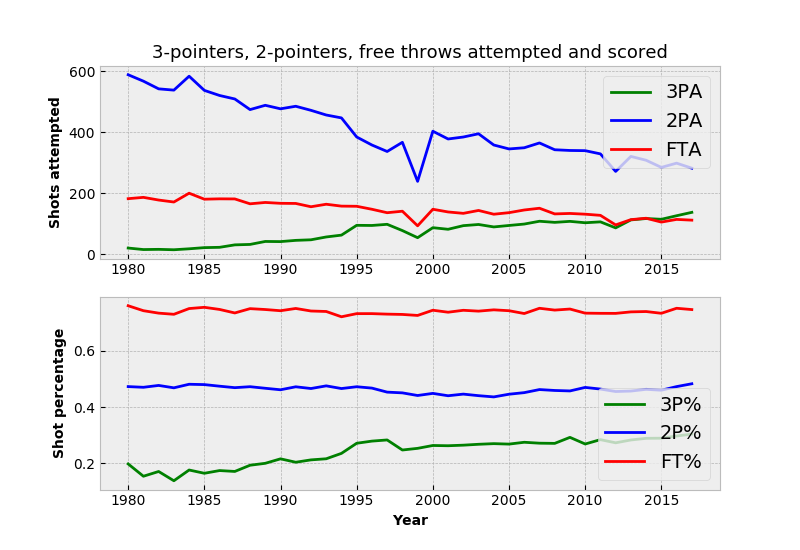

In [8]:
fig, axes = plt.subplots(2, 1, subplot_kw=dict(), figsize=(8,10))
fig.set_figheight(5.5)
axes[0].plot(df2[['Year']],df2[['3PA']],color='g')
axes[0].plot(df2[['Year']],df2[['2PA']],color='b')
axes[0].plot(df2[['Year']],df2[['FTA']],color='r')
axes[0].legend(['3PA', '2PA', 'FTA'], loc='upper right')
axes[1].plot(df2[['Year']],df2[['3P%']],color='g')
axes[1].plot(df2[['Year']],df2[['2P%']],color='b')
axes[1].plot(df2[['Year']],df2[['FT%']],color='r')
axes[1].legend(['3P%', '2P%', 'FT%'], loc='lower right')
axes[1].set_xlabel('Year')
axes[0].set_ylabel('Shots attempted')
axes[1].set_ylabel('Shot percentage')
axes[0].set_title('3-pointers, 2-pointers, free throws attempted and scored')
fig.savefig('shots.png')

### Lets average height and weigths of players over years. Also lets add a statistic 'height/weight ratio as hw' 

In [9]:
pldf['hw']=pldf['height']/pldf['weight']
pldfy = pldf[['3P%','Player','2P%','FG%','height','hw','Year','weight','Pos']].dropna(axis=0).groupby('Year').aggregate('mean').reset_index().drop_duplicates()

<IPython.core.display.Javascript object>


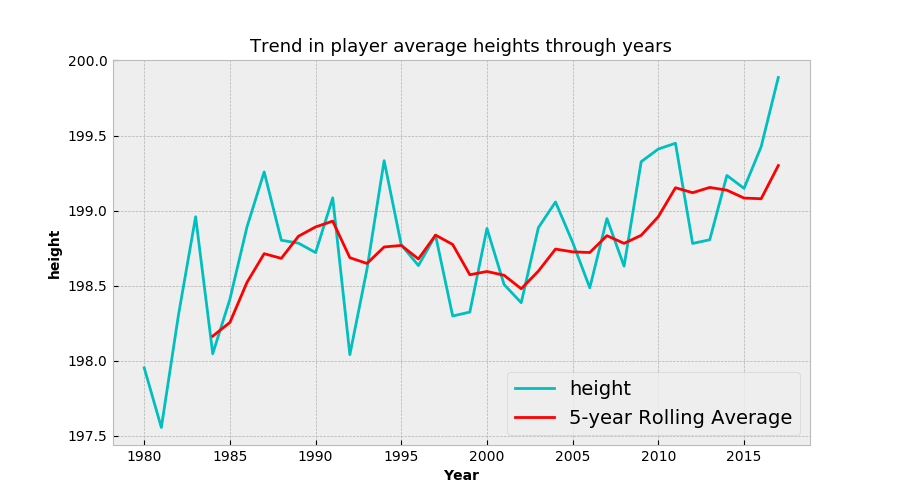

In [10]:
plot_metric(pldfy, 'height', 5, 'height')

<IPython.core.display.Javascript object>


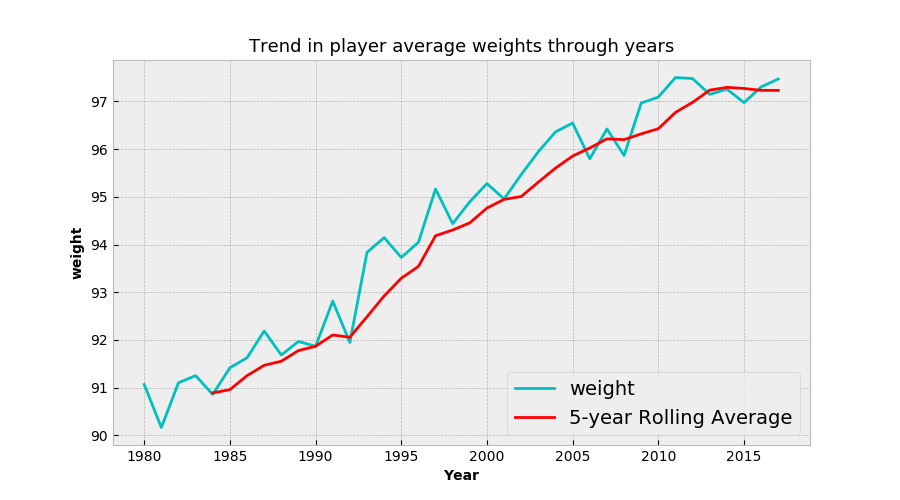

In [11]:
plot_metric(pldfy, 'weight', 5, 'weight')

### The most interesting points are in mid-1990s when the 3-pointer line was moved back and then after 3-4 years was moved back in. The height trend shows a slump in those years and then again the trend is towards increasing weight.The weights show a consistent increase but is shown to stabilitze during the recent years.

## <span style="color:blue"> Prediction of height and weight for coming years.
### Now, let us try to predict the average heights and weights for upcoming years from the trends. Let us try linear fit and polynomial fit for the trends.

<IPython.core.display.Javascript object>


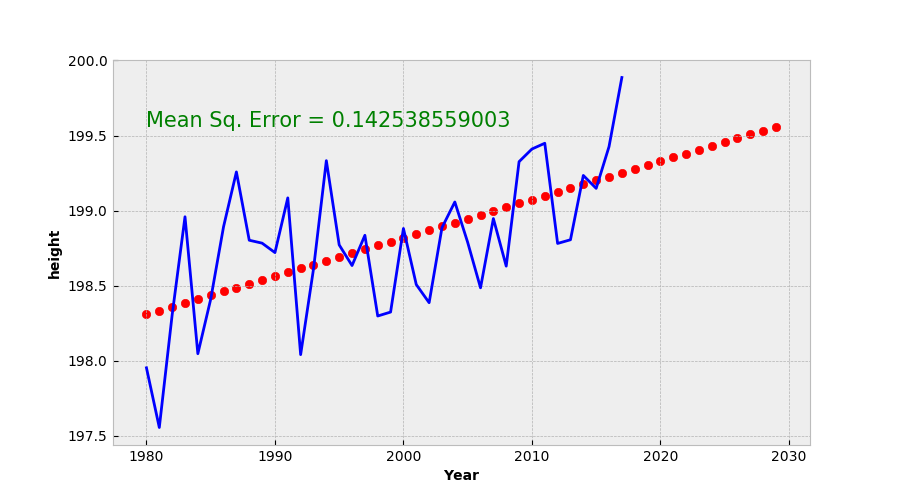

In [12]:
linear_reg(pldfy,'Year','height')

### The variation of height shows a steady increase but the graph is too erratic and difficult to predict, hence let us try to fit the average weight and average height weight ratio. Lets model the weight and try to predict.

<IPython.core.display.Javascript object>


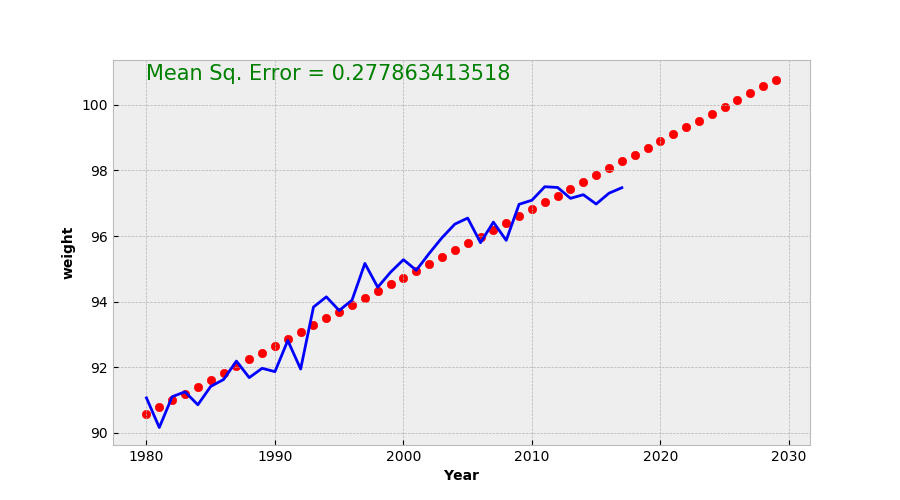

In [13]:
linear_reg(pldfy,'Year','weight')

### The linear fit for weight looks good at the lower years but during recent year the trend has stabilitzed, hence lets try polynmial fit and start with quadratic fit.

<IPython.core.display.Javascript object>


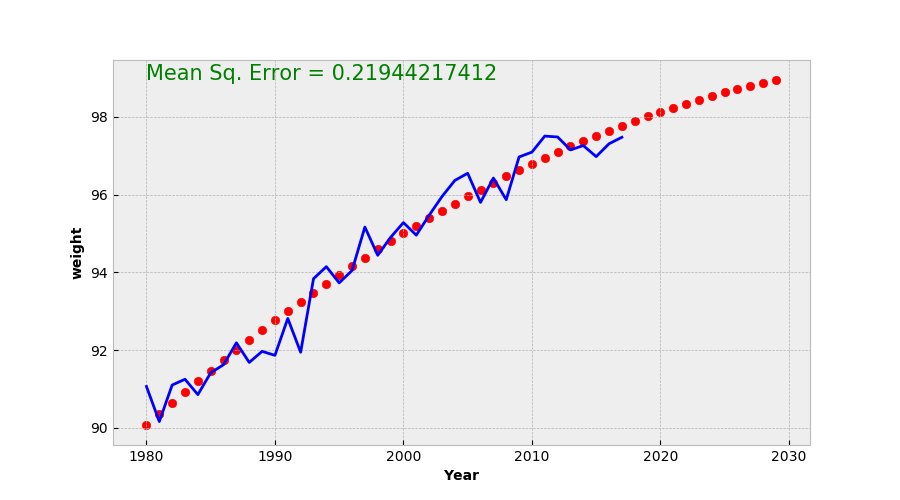

In [14]:
polynomial_fit(pldfy,'Year','weight',2)

### The quadratic fit looks good for weight and predicts the weight increase to continue but stabilize over the years. We know that the height and weight are heavily dependent on the play position. 

## <span style="color:blue"> Role of height and weight on play positons
### Lets analyze the role of height and weight in play positions. Lets visualize the ### heights and weights of top 15 players for the year 2016.

<IPython.core.display.Javascript object>


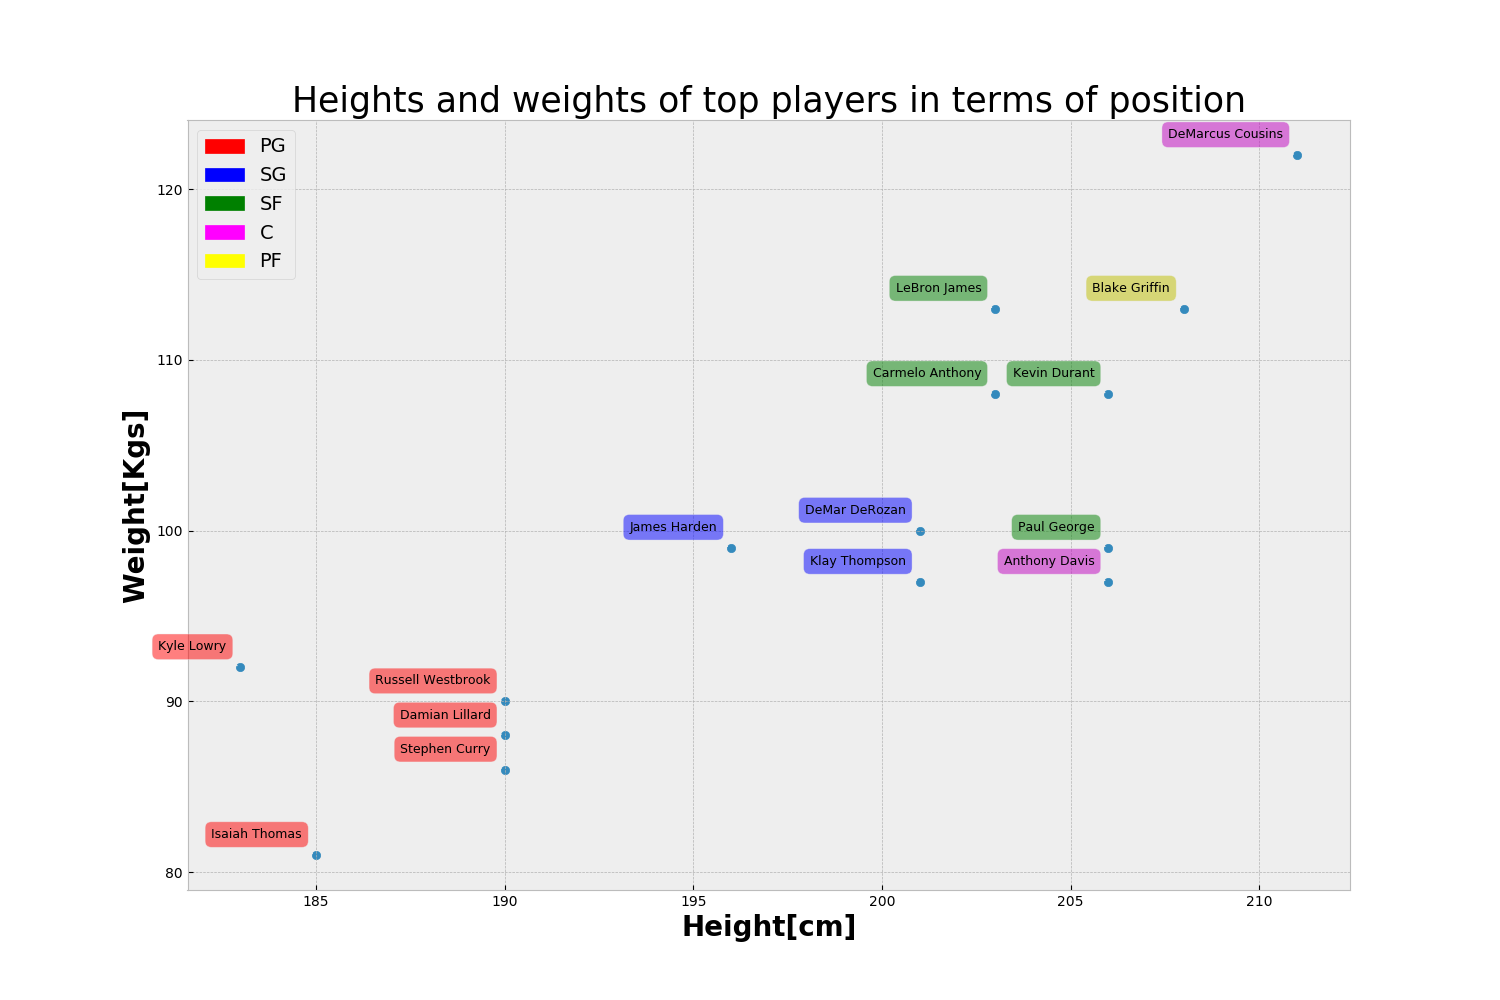

In [15]:
hw_plot(df,pl,2016,15)

### We can see how the heights and weights of players are clustered according to their play position. We can look at height histogram for different play positions to understand the distribution better.

<IPython.core.display.Javascript object>


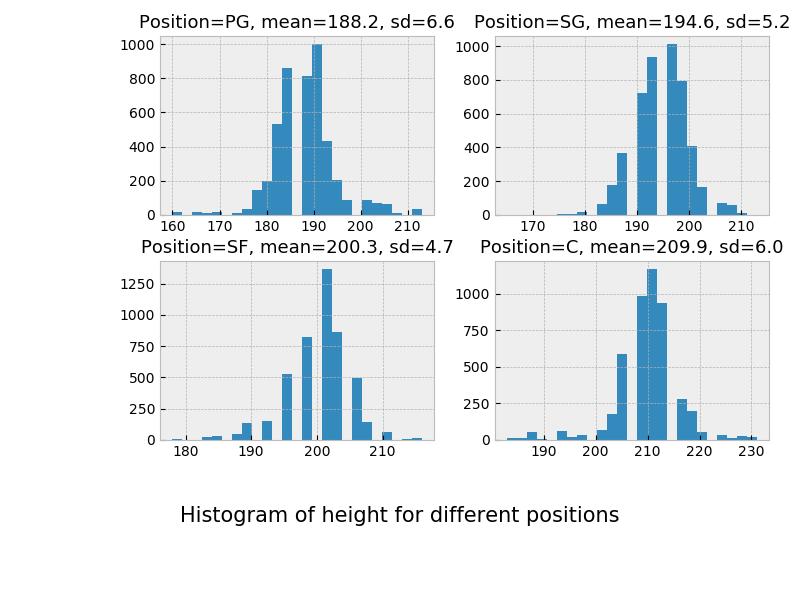

In [16]:
hw_bin_plot(pldf,'height')

### Let us plot the trend in height and weight of players with respect to thieir play positions.

<IPython.core.display.Javascript object>


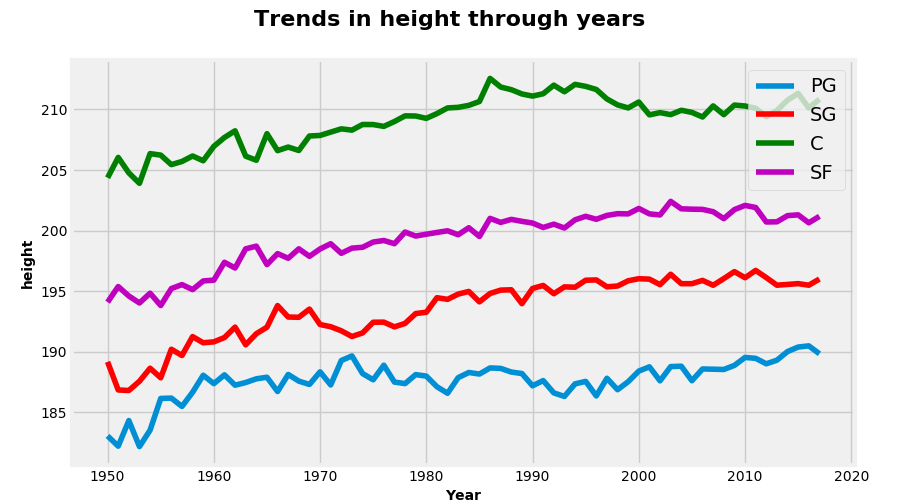

In [17]:
plot_allpos_metric(pldf,'height','height')

<IPython.core.display.Javascript object>


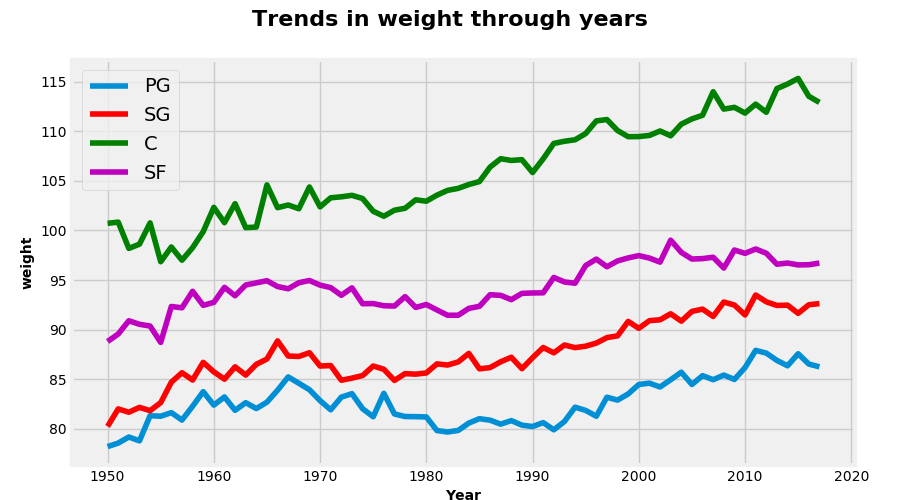

In [18]:
plot_allpos_metric(pldf,'weight','weight')

## <span style="color:blue"> Correlation of height and weight with shooting performance
### Let us study the correlation in different metrics with percentages of 3-points, 2-points and free throws.

In [19]:
print(pldf[['height','weight','3P%','2P%','FT%','hw']].corr())

          height    weight       3P%       2P%       FT%        hw
height  1.000000  0.821046 -0.210524  0.158146 -0.233026 -0.644015
weight  0.821046  1.000000 -0.182026  0.153462 -0.237490 -0.955293
3P%    -0.210524 -0.182026  1.000000 -0.071275  0.212571  0.128704
2P%     0.158146  0.153462 -0.071275  1.000000  0.063486 -0.126171
FT%    -0.233026 -0.237490  0.212571  0.063486  1.000000  0.200922
hw     -0.644015 -0.955293  0.128704 -0.126171  0.200922  1.000000


### We can see correlation of height with 3-points and free throws referring to a corrrelation of height and weight with shooting ability. This correlation becomes more prominent when we chose players who have played a substantial number of games. Lets find the correlation in heights, weights along with play performance metrics like 3-point percentage, 2-point percentage and free throw percentage. Lets also add the number of minutes played and age of the players to find any correlation in age and play time. Lets plot the correlation in a heatmap.

In [20]:
f=pldf[pldf.G>30][['height','weight','3P%','2P%','FT%','Age','MP']]

<IPython.core.display.Javascript object>


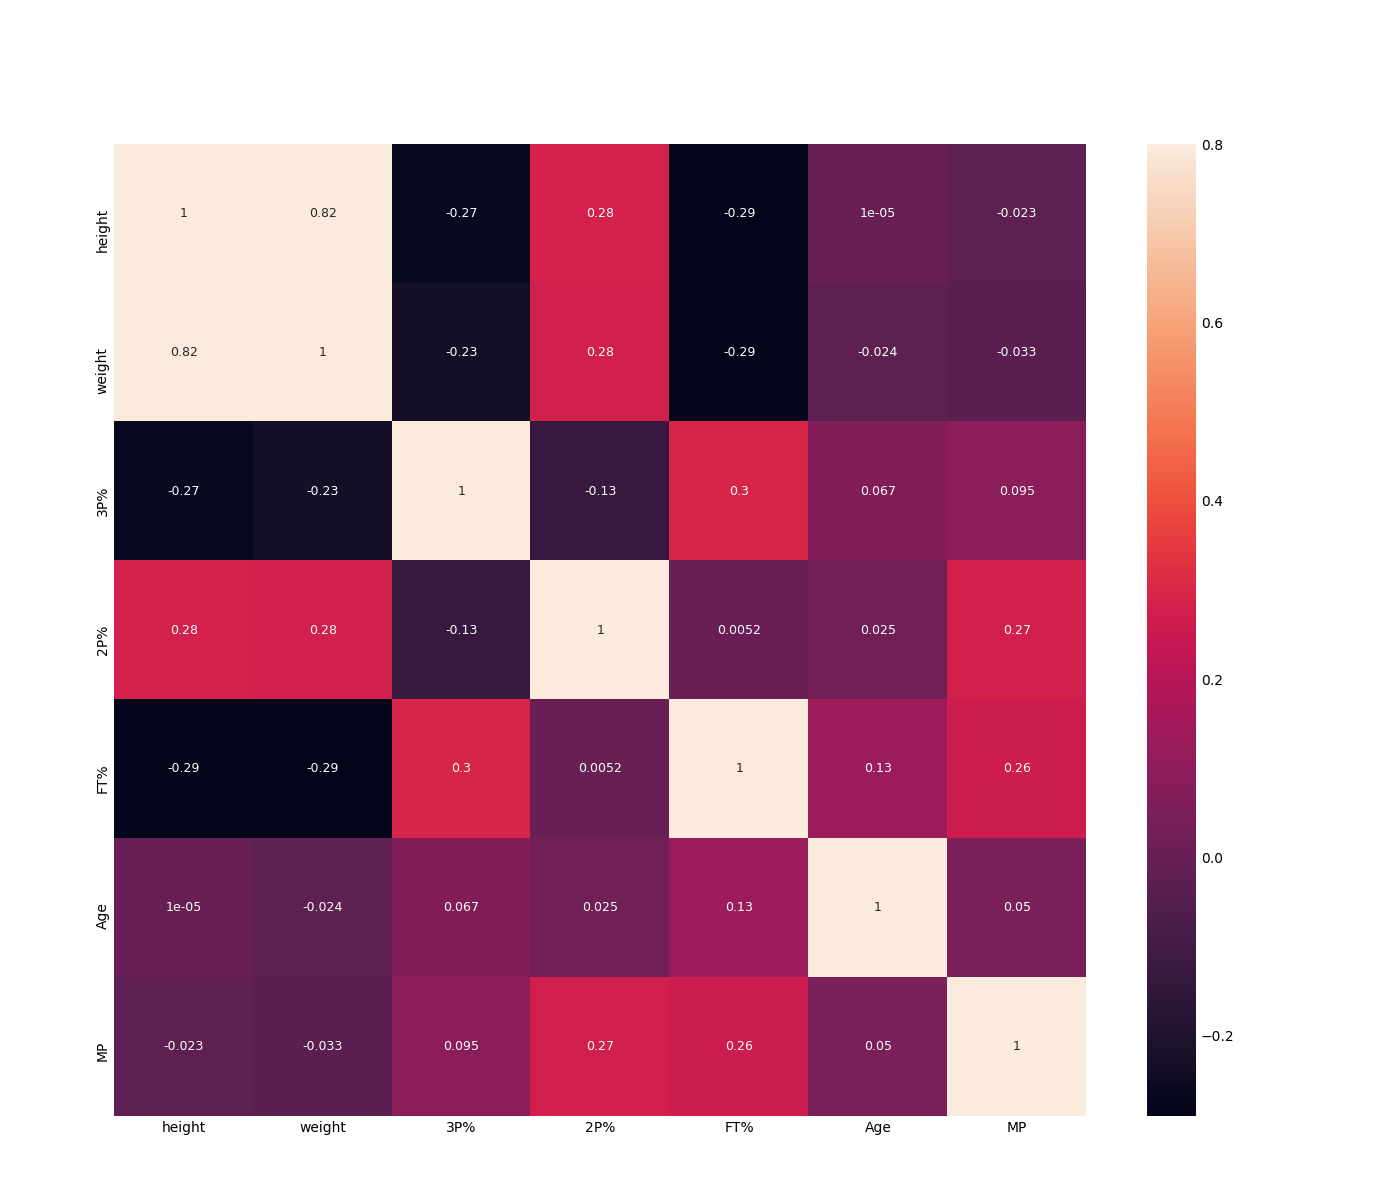

In [21]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(f.corr(), vmax=0.8, square=True, annot=True)
plt.show()

### We can see a strong negative correlation between height and weight and 3-point and free throw percentages, points to the fact that height and weight imapcts shooting ability negatively. A weaker positive correlation between height, weight and 2-point percentage shows height and weight are positive factors for success around the ream.

## <span style="color:blue"> Pearson correlation coefficient and the 2-tailed p-value.

In [23]:
fnn = f.dropna(axis=0)

In [24]:
print('Correlation of free throw percentage with height, weight, age and minutes played')
for col in fnn.columns:
    if col!='FT%' and col!='3P%' and col!='2P%':
        print(col, pearsonr(fnn[col].values,fnn['FT%'].values))
print('\n')
print('Correlation of 3-pointer percentage with height, weight, age and minutes played')
for col in fnn.columns:
    if col!='FT%' and col!='3P%' and col!='2P%':
        print(col, pearsonr(fnn[col].values,fnn['3P%'].values))

Correlation of free throw percentage with height, weight, age and minutes played
height (-0.2708989406111274, 7.3348146389681842e-200)
weight (-0.27019442182008191, 8.5642027092376444e-199)
Age (0.13315408734407269, 2.3287142542801463e-48)
MP (0.23426170289264189, 1.5524912420839464e-148)


Correlation of 3-pointer percentage with height, weight, age and minutes played
height (-0.2655575217043642, 7.5397581765425018e-192)
weight (-0.23349540293230603, 1.4973517074854514e-147)
Age (0.066860425477955551, 2.6129764112377518e-13)
MP (0.09477007863877121, 3.1421599962743605e-25)


### We can see that p-value is 0 in all these cases, denoting a high level of significance greater than %99. Hence we can infer with a pretty high level of confidence that shooting ability (3-pointer shots and free throws) are correlated with height, weight and position of play.
